## Question 9 -

Write a program to read the data from the following link, perform data analysis and answer the following
questions

**Note -**

1. Write code comments wherever required for code understanding

**Link** - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

**Insights to be drawn -**

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after 2015

● Draw plots to show the distribution between city and electric vehicle type

In [68]:
# Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import squarify
import matplotlib.pyplot as plt
%matplotlib inline

### Data Ingestion


In [3]:
# Read the data from the CSV file
data_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url)

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


### Basic Data Analysis

In [5]:
df.shape

(130443, 17)

In [6]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

**More details about the features present in the dataset**

1. VIN (1-10): This column likely represents the Vehicle Identification Number, a unique identifier assigned to individual vehicles.

2. County: This column contains the name or code of the county where the vehicle is registered or located.

3. City: This column represents the name of the city where the vehicle is registered or located.

4. State: This column contains the abbreviation or code for the state where the vehicle is registered or located.

5. Postal Code: This column represents the postal code or ZIP code associated with the vehicle's location.

6. Model Year: This column indicates the year in which the vehicle model was manufactured.

7. Make: This column contains the brand or manufacturer of the vehicle.

8. Model: This column represents the specific model name or number of the vehicle.

9. Electric Vehicle Type: This column specifies the type or category of the electric vehicle, such as electric car, electric truck, or electric scooter.

10. Clean Alternative Fuel Vehicle (CAFV) Eligibility: This column indicates whether the vehicle qualifies as a Clean Alternative Fuel Vehicle, which typically refers to vehicles using cleaner fuels or technologies.

11. Electric Range: This column represents the electric range of the vehicle, indicating the distance it can travel on electric power alone.

12. Base MSRP: This column contains the Manufacturer's Suggested Retail Price (MSRP) for the base model of the vehicle.

13. Legislative District: This column indicates the legislative district associated with the vehicle's location.

14. DOL Vehicle ID: This column represents the unique identification number assigned to the vehicle by the Department of Licensing (DOL).

15. Vehicle Location: This column specifies the location or address where the vehicle is registered or located.

16. Electric Utility: This column may indicate the electric utility company associated with the vehicle or its charging infrastructure.

17. 2020 Census Tract: This column refers to the census tract code or identifier associated with the vehicle's location, based on the 2020 Census data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,130440.0,9.816763e+04,2.492198e+03,1.730000e+03,9.805200e+04,9.812100e+04,9.837000e+04,9.970100e+04
Model Year,130443.0,2.019555e+03,2.989137e+00,1.997000e+03,2.018000e+03,2.020000e+03,2.022000e+03,2.023000e+03
Electric Range,130443.0,7.670572e+01,9.942157e+01,0.000000e+00,0.000000e+00,2.300000e+01,1.510000e+02,3.370000e+02
Base MSRP,130443.0,1.495677e+03,9.844748e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,130138.0,2.957703e+01,1.476751e+01,1.000000e+00,1.800000e+01,3.400000e+01,4.300000e+01,4.900000e+01
DOL Vehicle ID,130443.0,2.051796e+08,8.710573e+07,4.385000e+03,1.568004e+08,2.034934e+08,2.290791e+08,4.792548e+08
2020 Census Tract,130440.0,5.297177e+10,1.640658e+09,1.081042e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10


### Question 1: Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [9]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [18]:

non_clean_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']
non_clean_cars_info = non_clean_cars[['VIN (1-10)', 'Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']]
print("Cars that do not qualify for clean alternative fuel vehicle:")
non_clean_cars_info

Cars that do not qualify for clean alternative fuel vehicle:


,VIN (1-10),Model Year,Make,Model,Electric Range,Base MSRP,Clean Alternative Fuel Vehicle (CAFV) Eligibility
6,3FA6P0PU1G,2016,FORD,FUSION,19,0,Not eligible due to low battery range
7,WA1F2AFY8P,2023,AUDI,Q5 E,23,0,Not eligible due to low battery range
8,1FADP5CU0E,2014,FORD,C-MAX,19,0,Not eligible due to low battery range
11,7SAYGDEF4N,2022,TESLA,MODEL Y,0,0,Eligibility unknown as battery range has not b...
14,1FADP5FU4H,2017,FORD,C-MAX,20,0,Not eligible due to low battery range
...,...,...,...,...,...,...,...
130437,WBA13AG06M,2021,BMW,530E,21,0,Not eligible due to low battery range
130438,7SAYGDEE6P,2023,TESLA,MODEL Y,0,0,Eligibility unknown as battery range has not b...
130439,1N4BZ1CV7N,2022,NISSAN,LEAF,0,0,Eligibility unknown as battery range has not b...
130440,5YJYGDEE8M,2021,TESLA,MODEL Y,0,0,Eligibility unknown as battery range has not b...


### Question 2: Get all TESLA cars with the model year, and model type made in Bothell City

In [22]:

tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]
tesla_cars_info = tesla_cars_bothell[['Make', 'City', 'Model Year', 'Electric Vehicle Type']]
print("\nTESLA cars made in Bothell City:")
print(tesla_cars_info)


TESLA cars made in Bothell City:
         Make     City  Model Year           Electric Vehicle Type
39      TESLA  Bothell        2020  Battery Electric Vehicle (BEV)
217     TESLA  Bothell        2022  Battery Electric Vehicle (BEV)
218     TESLA  Bothell        2022  Battery Electric Vehicle (BEV)
222     TESLA  Bothell        2018  Battery Electric Vehicle (BEV)
292     TESLA  Bothell        2017  Battery Electric Vehicle (BEV)
...       ...      ...         ...                             ...
129778  TESLA  Bothell        2019  Battery Electric Vehicle (BEV)
129954  TESLA  Bothell        2021  Battery Electric Vehicle (BEV)
129976  TESLA  Bothell        2014  Battery Electric Vehicle (BEV)
130295  TESLA  Bothell        2022  Battery Electric Vehicle (BEV)
130392  TESLA  Bothell        2018  Battery Electric Vehicle (BEV)

[2407 rows x 4 columns]


**In the dataset, there are total 2407 EVs that are made by TESLA in Bothell city.**

### Question 3: Get all the cars that have an electric range of more than 100, and were made after 2015

In [23]:

electric_cars_100_range = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
electric_cars_info = electric_cars_100_range[['Make', 'Model', 'Model Year', 'Electric Range']]
print("\nCars with electric range > 100 and made after 2015:")
print(electric_cars_info)


Cars with electric range > 100 and made after 2015:
          Make    Model  Model Year  Electric Range
0        TESLA  MODEL X        2018             238
2        TESLA  MODEL 3        2019             220
4        TESLA  MODEL S        2017             210
12       TESLA  MODEL 3        2020             308
13       TESLA  MODEL 3        2020             322
...        ...      ...         ...             ...
130417   TESLA  MODEL Y        2020             291
130428  NISSAN     LEAF        2018             151
130432   TESLA  MODEL Y        2020             291
130436   TESLA  MODEL 3        2018             215
130441   TESLA  MODEL X        2020             293

[34066 rows x 4 columns]


**There are total 34066 EVs that have Electric Range > 100 and Made after 2015.**

### Question 4 : Draw plots to show the distribution between city and electric vehicle type

In [47]:
city_wise_count = df['City'].value_counts()

city_wise_count

City
Seattle        22894
Bellevue        6748
Redmond         4820
Vancouver       4652
Kirkland        4071
               ...  
Asheboro           1
Germantown         1
Saint Jacob        1
Watertown          1
Aurora             1
Name: count, Length: 656, dtype: int64

To get a good graphical representation we can avoid the cities with less than 100 EVs

In [79]:
city_wise_count = city_wise_count[city_wise_count.apply( lambda x: x>= 100)]

city_wise_count

City
Seattle         22894
Bellevue         6748
Redmond          4820
Vancouver        4652
Kirkland         4071
                ...  
Sultan            104
Port Ludlow       104
Lopez Island      102
Kelso             102
Fircrest          100
Name: count, Length: 132, dtype: int64

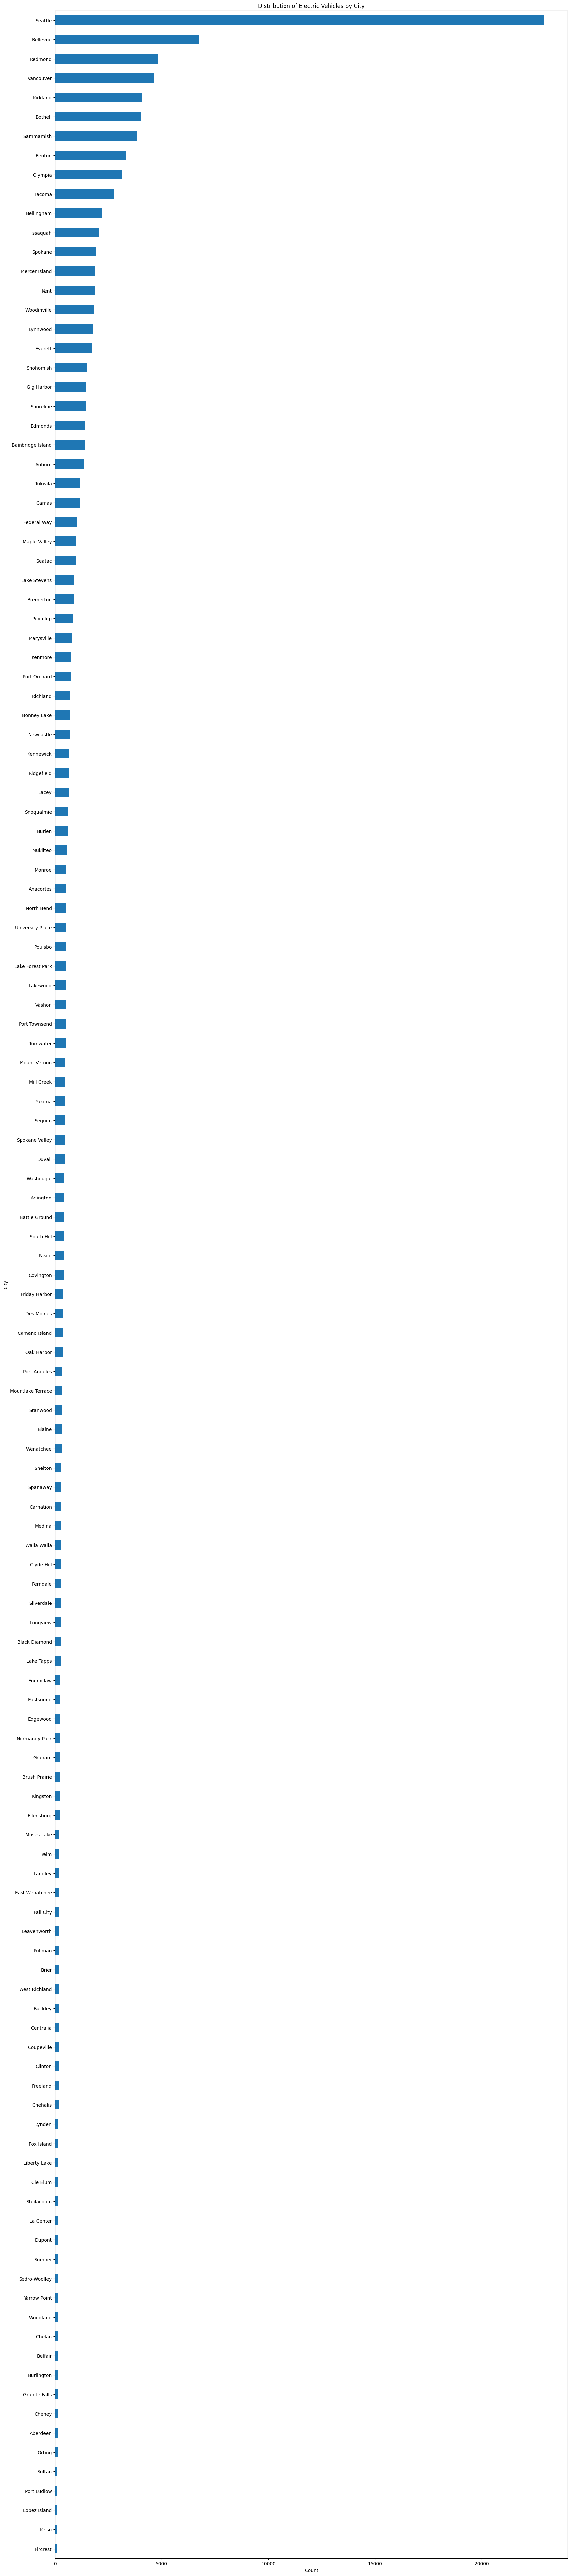

In [82]:

plt.figure(figsize=(20, 100))
city_wise_count.sort_values(ascending=True).plot(kind='barh')
plt.title('Distribution of Electric Vehicles by City')
plt.ylabel('City')
plt.xlabel('Count')
plt.yticks(rotation= 0)
plt.show()

In [49]:
df.groupby(['City', 'Electric Vehicle Type']).size().unstack()

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
City,,
Aberdeen,73.0,42.0
Acme,3.0,4.0
Addy,1.0,1.0
Aiea,NaN,1.0
Airway Heights,10.0,8.0
...,...,...
Yacolt,19.0,13.0
Yakima,309.0,162.0
Yarrow Point,102.0,24.0


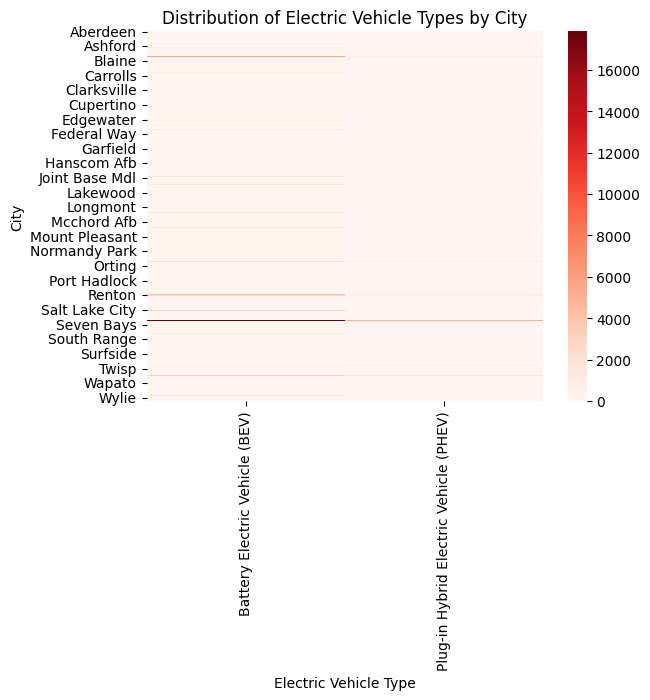

In [56]:
ct_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack().fillna(0)
sns.heatmap(ct_counts, cmap='Reds')
plt.title('Distribution of Electric Vehicle Types by City')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('City')
plt.show()

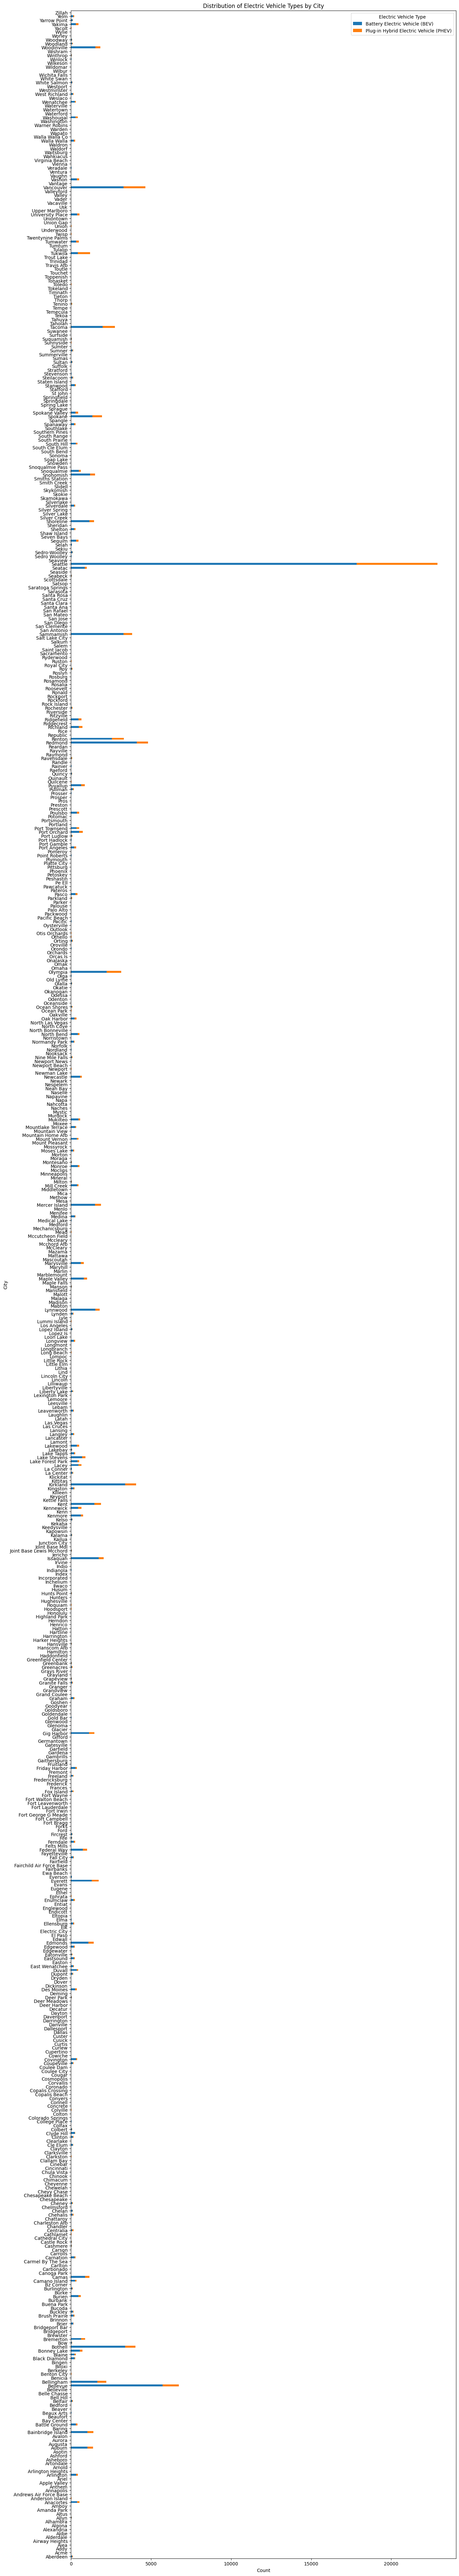

In [73]:
grouped_data = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()

grouped_data.plot.barh(rot=0, figsize=(15,100), stacked=True)

plt.ylabel('City')
plt.xlabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')

plt.show()